*import packages*

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [57]:
df1 = pd.read_csv('/Telco-Customer-Churn.csv')


In [58]:
df1.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [59]:
df1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [60]:
print(df1.dtypes)

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object


CONVERT object type into numerical using label encoder

In [61]:
from sklearn.preprocessing import LabelEncoder



encoder = LabelEncoder()


for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = encoder.fit_transform(df1[column])



Top 10 Features Impacting Churn:
contract            0.396713
tenure              0.352229
onlinesecurity      0.289309
techsupport         0.282492
onlinebackup        0.195525
monthlycharges      0.193356
paperlessbilling    0.191825
deviceprotection    0.178134
dependents          0.164221
seniorcitizen       0.150889
Name: churn, dtype: float64


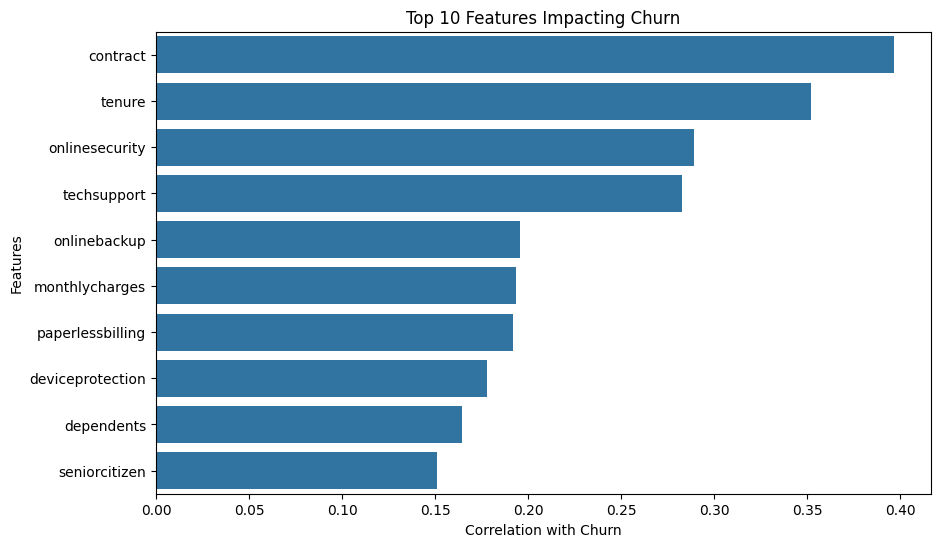

In [62]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Get the correlation of all features with the target 'churn'
churn_correlation = correlation_matrix['churn'].abs().sort_values(ascending=False)

# Select top 10 features excluding 'churn' itself
top_features = churn_correlation[1:11]

# Display the top features
print("Top 10 Features Impacting Churn:")
print(top_features)

# Optional: Visualize the top features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Features Impacting Churn')
plt.xlabel('Correlation with Churn')
plt.ylabel('Features')
plt.show()

Top 10 Features by Random Forest Importance:
             Feature  Importance
17    monthlycharges    0.176539
4             tenure    0.174955
18      totalcharges    0.167721
14          contract    0.081976
16     paymentmethod    0.051153
8     onlinesecurity    0.048006
11       techsupport    0.043074
9       onlinebackup    0.027847
0             gender    0.027486
15  paperlessbilling    0.026085

Top 10 Features by Correlation with Churn:
contract            0.396713
tenure              0.352229
onlinesecurity      0.289309
techsupport         0.282492
onlinebackup        0.195525
monthlycharges      0.193356
paperlessbilling    0.191825
deviceprotection    0.178134
dependents          0.164221
seniorcitizen       0.150889
Name: churn, dtype: float64

Common Features in Both Methods:
{'techsupport', 'contract', 'tenure', 'onlinebackup', 'onlinesecurity', 'paperlessbilling', 'monthlycharges'}


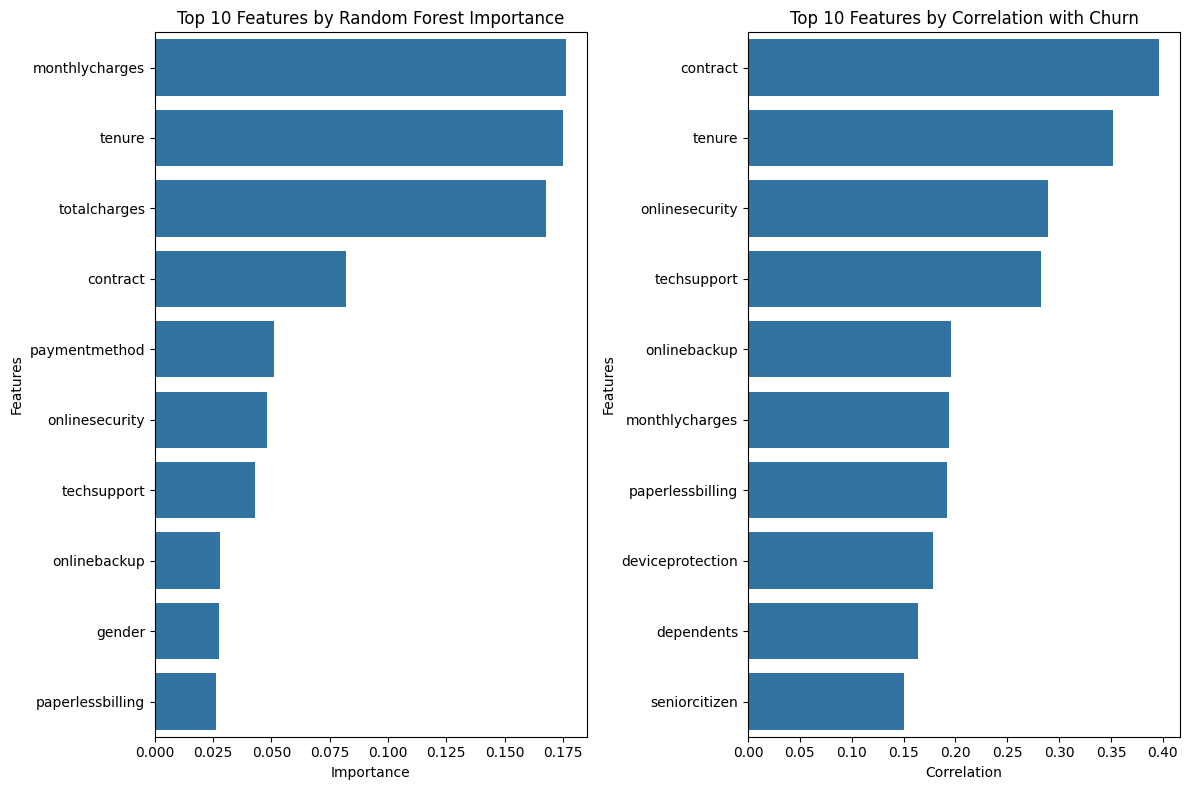

In [63]:
X = df1.drop(columns=['customerid', 'churn'])
y = df1['churn']

# Method 1: Calculate Feature Importance using Random Forest
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance and select top 10 features
top_importance_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Method 2: Calculate Correlation with Churn
correlation_matrix = df1.corr()
churn_correlation = correlation_matrix['churn'].abs().sort_values(ascending=False)
top_correlation_features = churn_correlation[1:11]  # Exclude 'churn' itself

# Identify common features
common_features = set(top_importance_features['Feature']).intersection(set(top_correlation_features.index))

# Display results
print("Top 10 Features by Random Forest Importance:")
print(top_importance_features)

print("\nTop 10 Features by Correlation with Churn:")
print(top_correlation_features)

print("\nCommon Features in Both Methods:")
print(common_features)

# Optional: Visualize the top features
plt.figure(figsize=(12, 8))

# Bar plot for Random Forest feature importances
plt.subplot(1, 2, 1)
sns.barplot(x=top_importance_features['Importance'], y=top_importance_features['Feature'])
plt.title('Top 10 Features by Random Forest Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Bar plot for correlation with churn
plt.subplot(1, 2, 2)
sns.barplot(x=top_correlation_features.values, y=top_correlation_features.index)
plt.title('Top 10 Features by Correlation with Churn')
plt.xlabel('Correlation')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7970191625266146

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



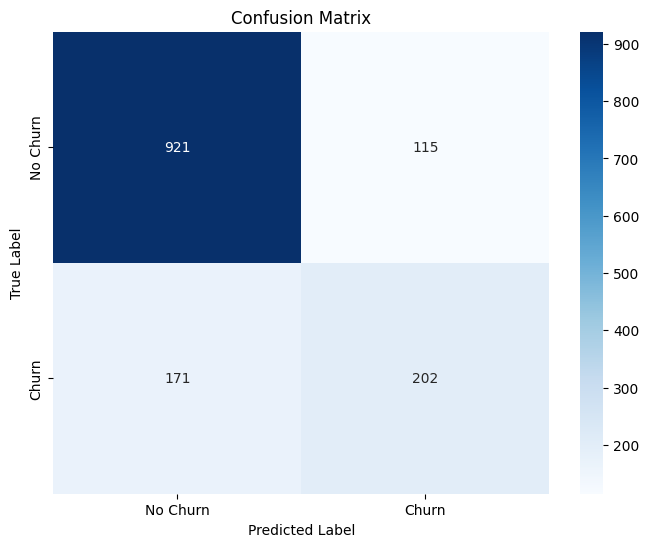

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df1[list(common_features)]
y = df1['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()